Setup

In [1]:
from LNL import define_save_LNL_model
from Full_model import define_model,train_and_save
from sparse_model_v2 import define_model_sparse,train_and_save_sparse
import os
import time
from image_receptive_field import visualize_img_recep
from compare_imgs import show_img_compare
from model_summary import show_lnr_combination,visualize_weights
from plot_error import show_error

cwd = os.getcwd()
LNL_model_path = cwd+'/data/LNL_model.pth'

Define the LNL section of the model and saves it for later use

In [2]:
# whether to use curated resolvable gaussian radius of ERF
FHWM=False
# if not define current spread arbitrarily here
current_spread = 1
# define the electrode grid
elec_side_dim = 8
activ_spread= 0.1
#define neuron grid
neu_side_dim = 16

# define the LNL layer with gaussian electrical receptive field
define_save_LNL_model(LNL_model_path,elec_side_dim, neu_side_dim, activ_spread, current_spread,FHWM)


Define the Full model to be trained

In [3]:
# define the full model to be trained
drop_rate = 0.2
# options for activation functions are "linear", "2sig" and "ReLU"
activ_funcs = ["linear", "2sig","ReLU"]
activ_func1 = activ_funcs[0]
activ_func2 = activ_funcs[2]
# shift and magnitude defines the 2sig function shape
shift = 0.1
magnitude = 60

AutoEncoder = define_model(elec_side_dim,neu_side_dim, LNL_model_path, drop_rate, activ_func1 ,activ_func2,shift,magnitude)
#AutoEncoder = define_model_sparse(elec_side_dim,neu_side_dim, LNL_model_path, drop_rate, activ_func1,activ_func2,shift,magnitude)

In [4]:
model_title = "Default_1spread_0.1noise" 

Train the model and save the model for result demo

In [5]:
# n_epochs = 50
# mult_lr = False
# start_time = time.time()
# train_and_save(n_epochs,AutoEncoder,model_title,mult_lr)
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

Sparse Model

In [6]:
# n_epochs = 50
# mult_lr = False
# start_time = time.time()
# _lambda = 0.01
# train_and_save_sparse(n_epochs,AutoEncoder,_lambda,mult_lr = False)
# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time} seconds")

Result Demo

In [7]:
# set the file directory to show
cwd = os.getcwd()
#model_path = cwd+f'/data/240729_data/model_lr = 0.0001_lnr_10elec.pth'

model_path = cwd+f'/data/model_{model_title}_lr = 0.0001.pth'

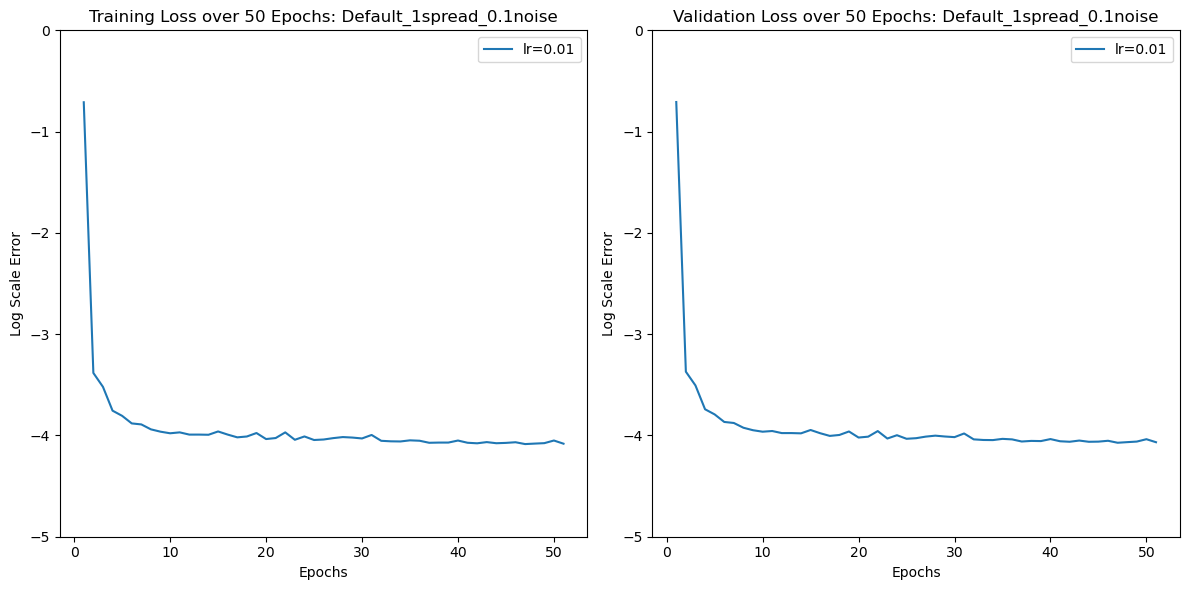

In [8]:
data_path = cwd + '/data/NN_output.pkl'

show_error(data_path,model_title)

Files already downloaded and verified
Files already downloaded and verified


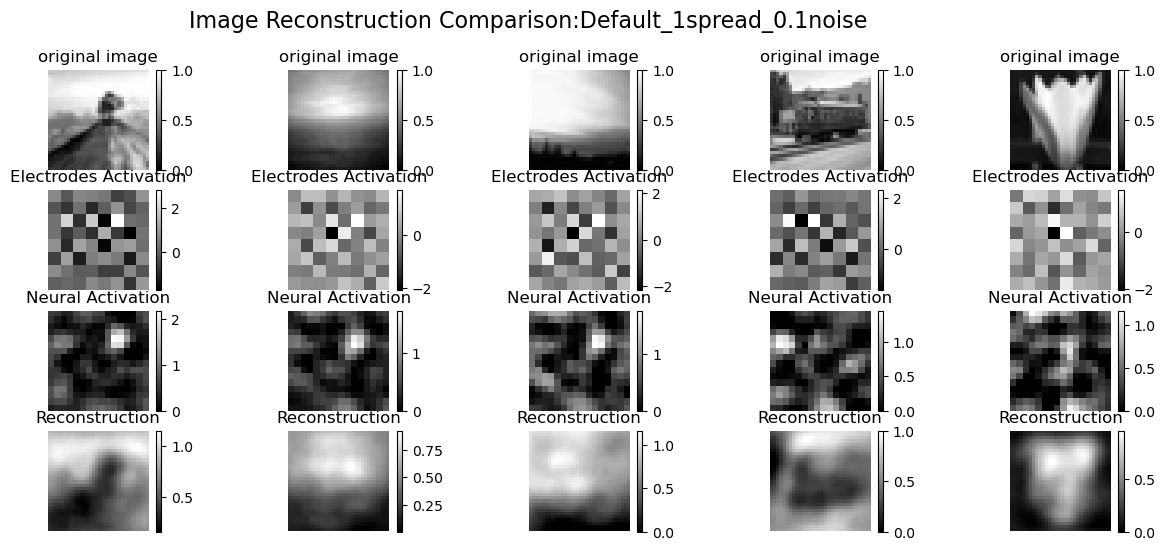

In [9]:

show_img_compare(model_path, AutoEncoder,model_title)

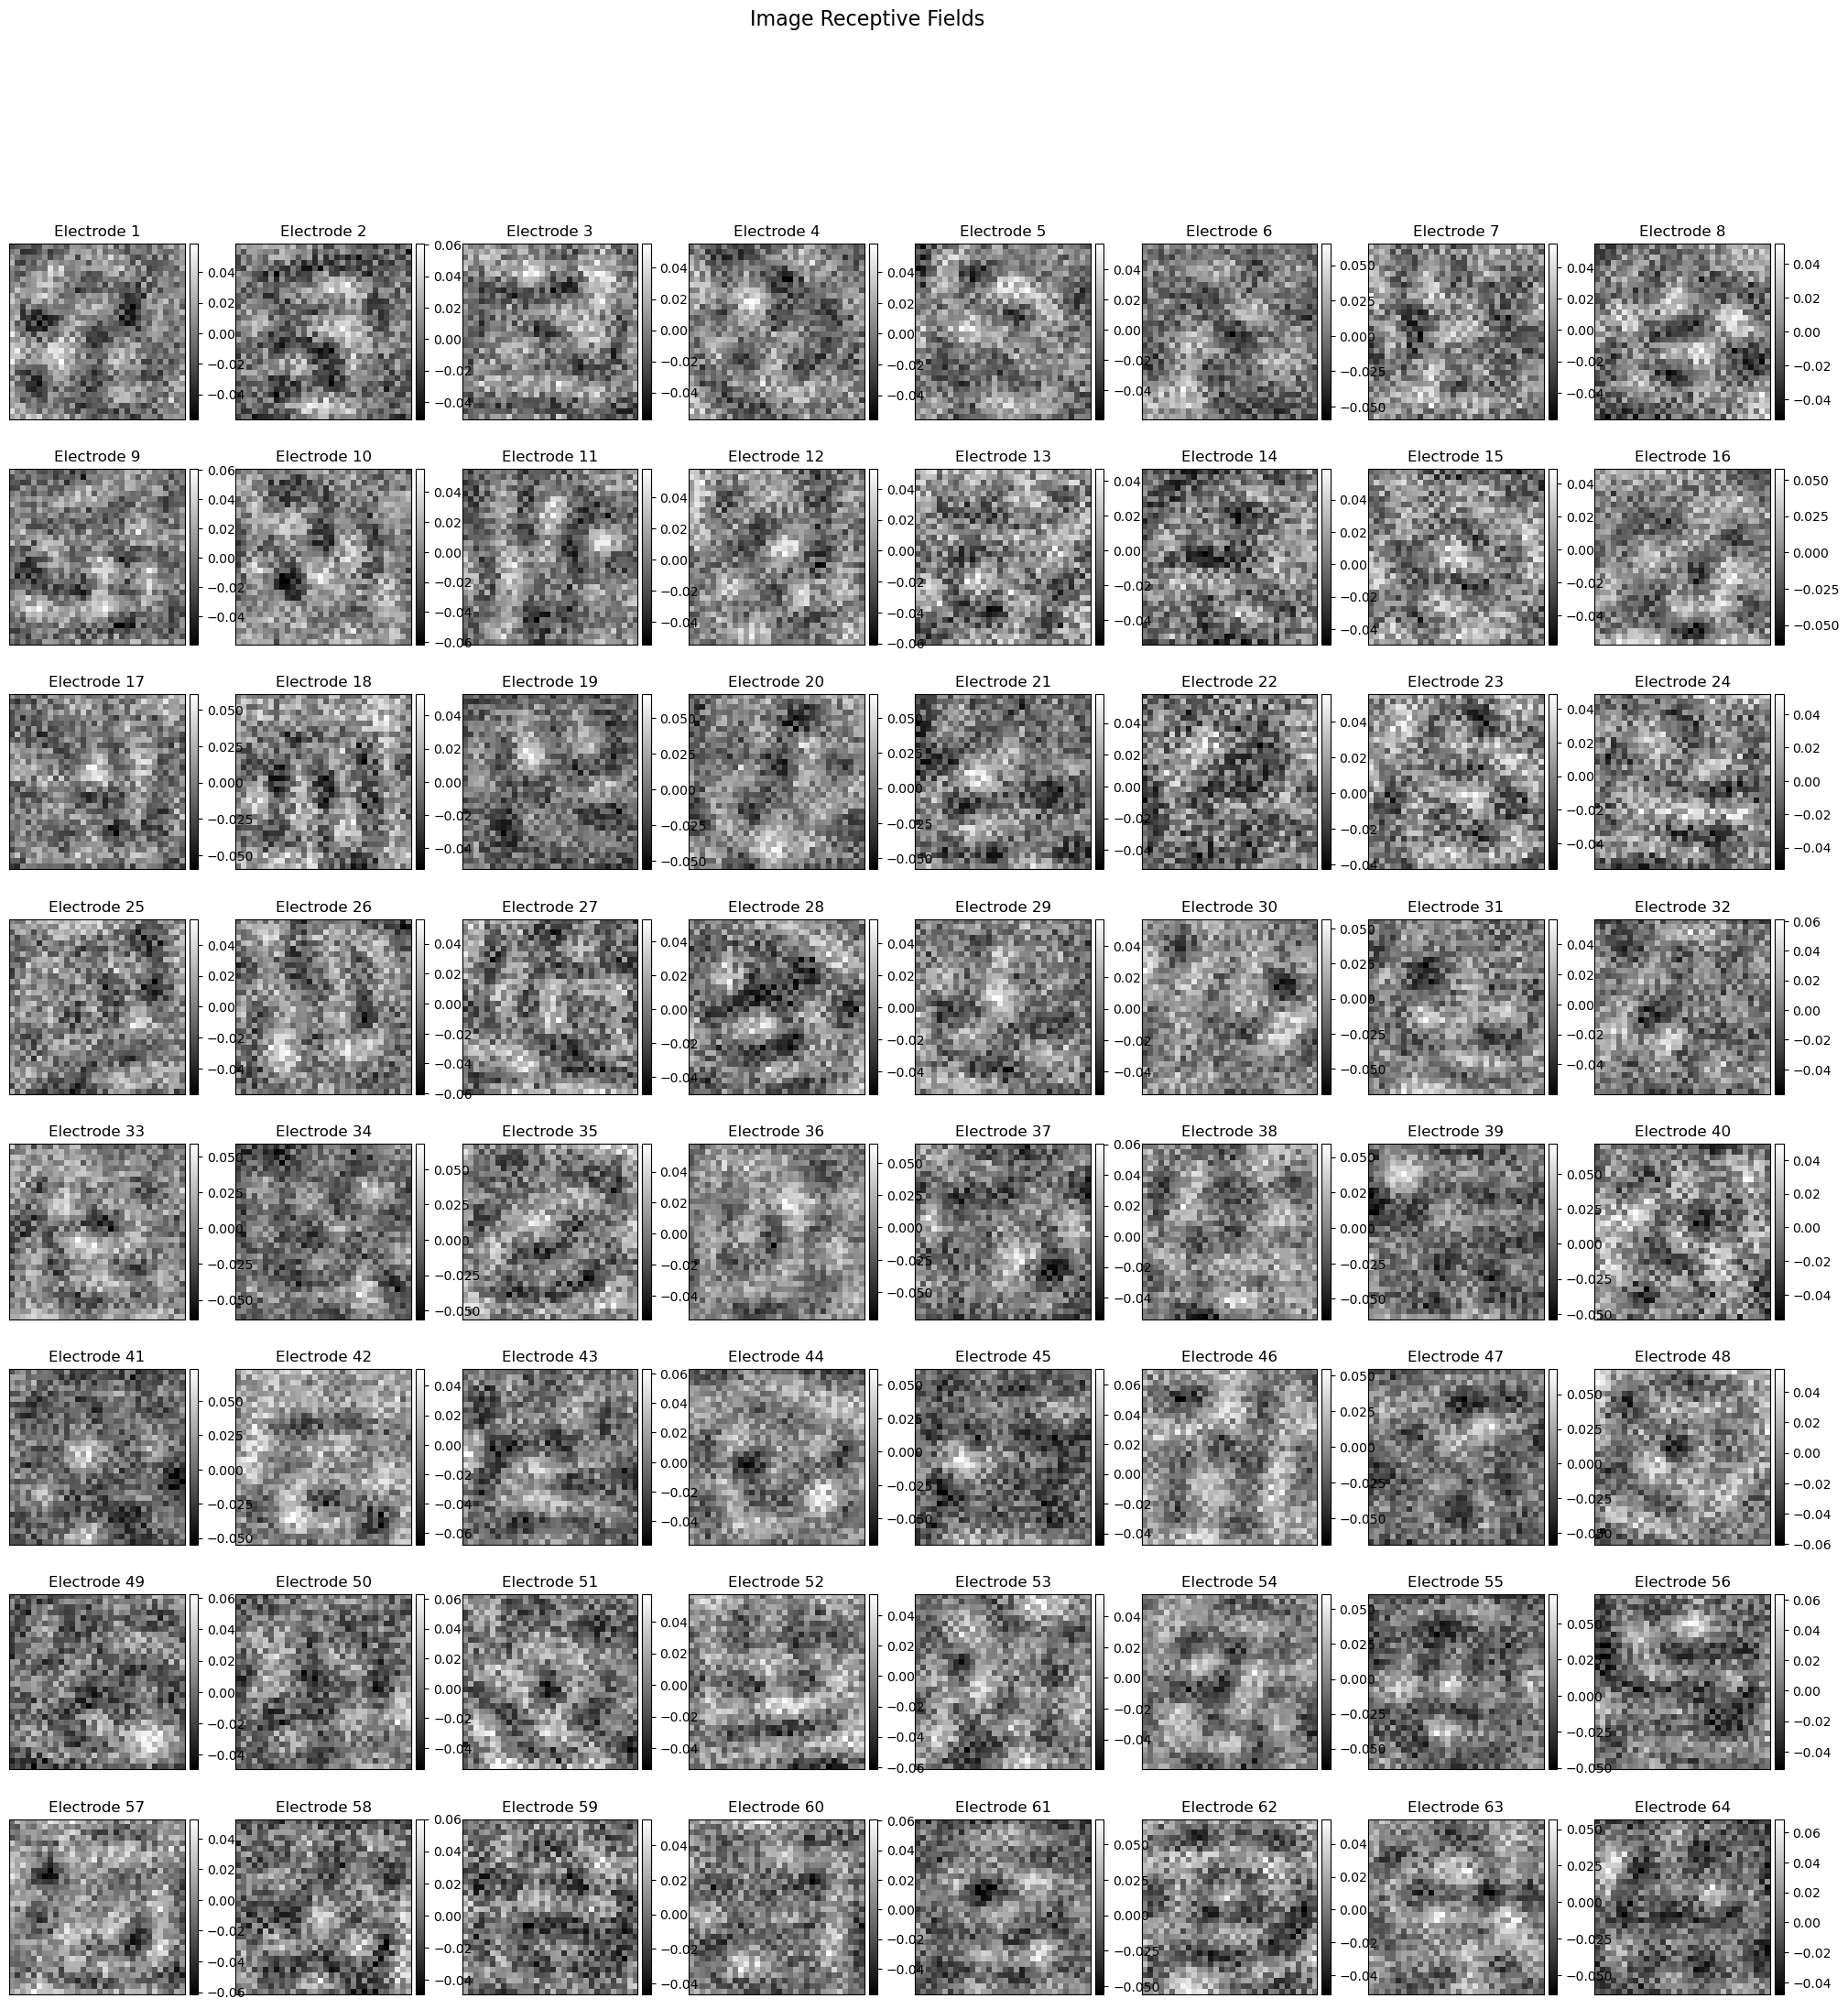

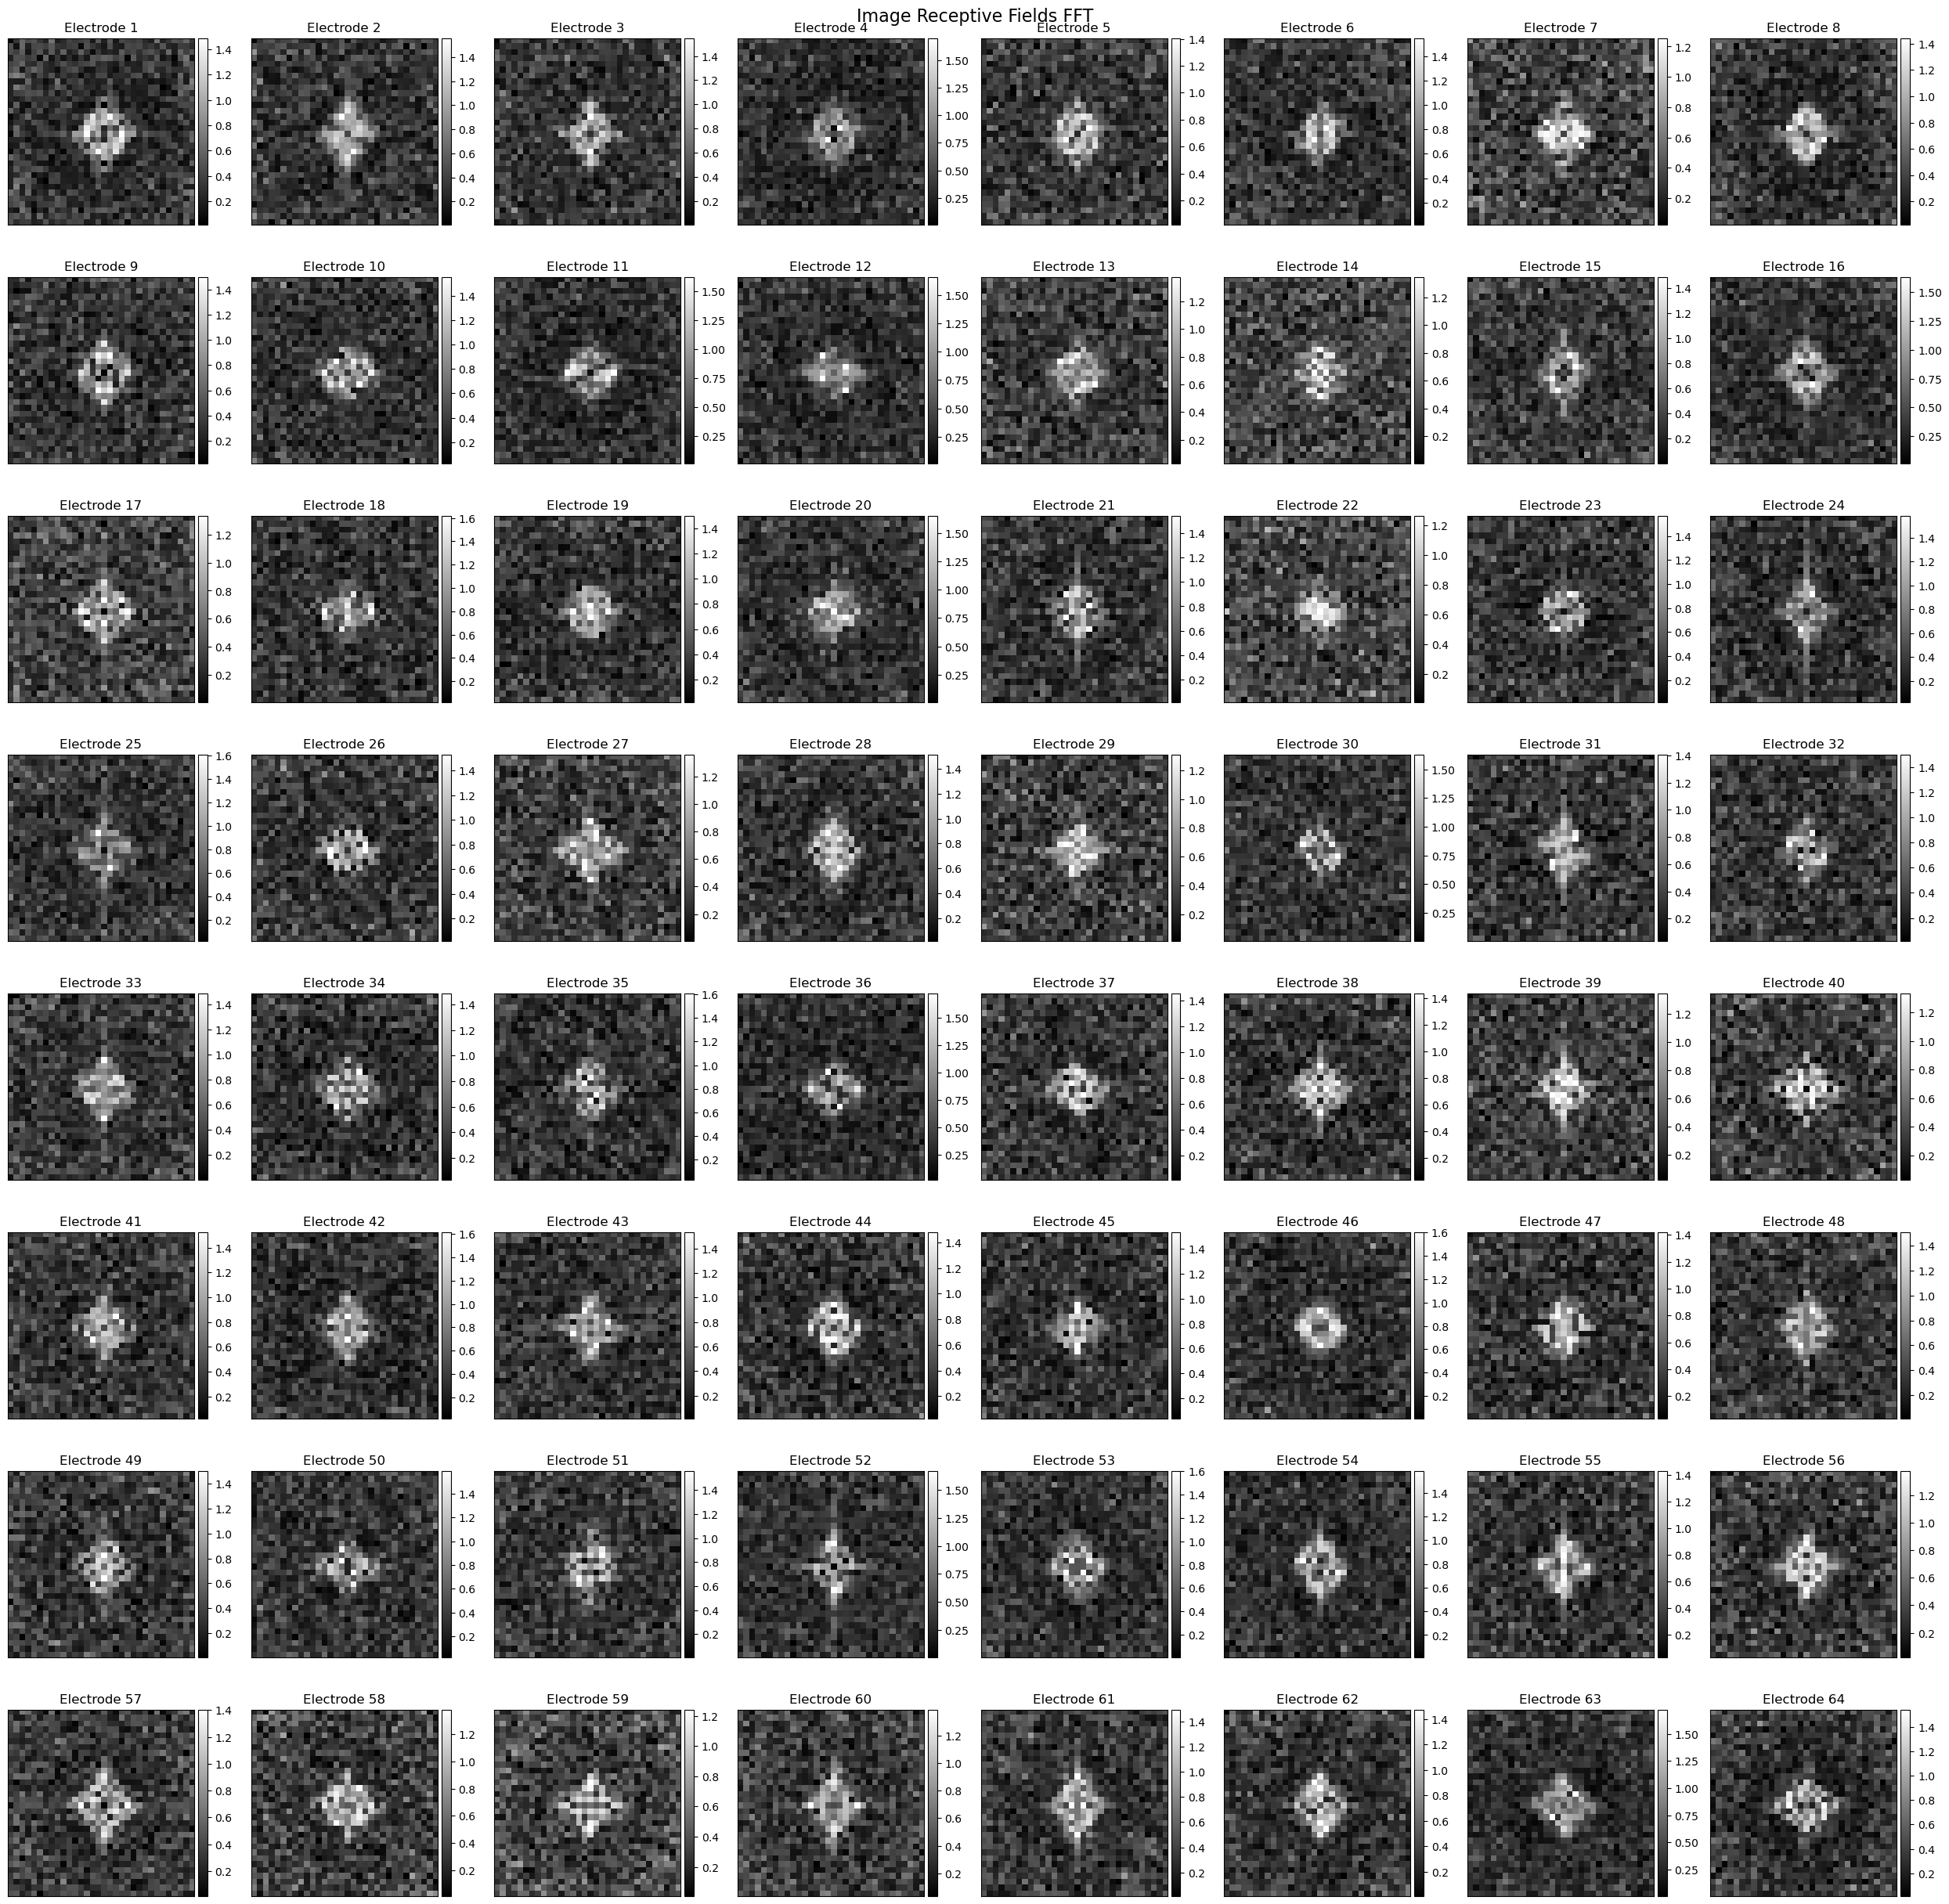

In [10]:
img_side_dim = 32
show_FFT = True
recep_mem = visualize_img_recep(model_path, AutoEncoder, img_side_dim,elec_side_dim,show_FFT)

In [11]:
visualize_weights(AutoEncoder)

AttributeError: type object 'AutoEncoder' has no attribute 'layer1'

(65536,)
(16384,)
(262144,)


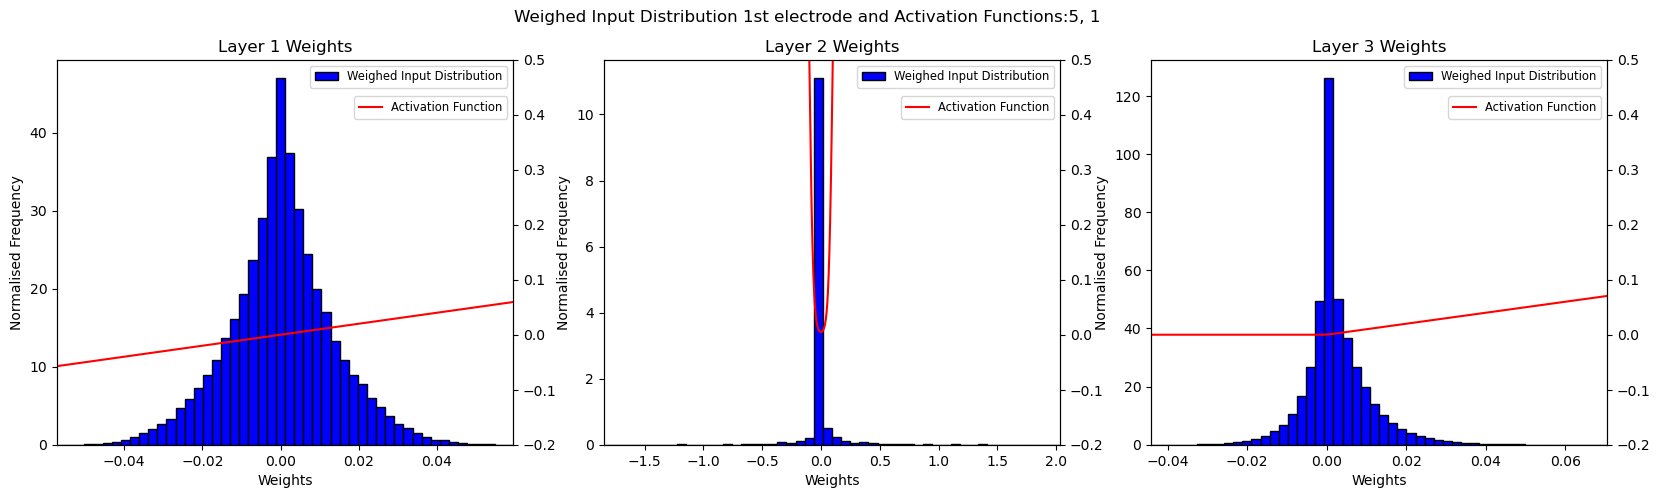

In [ ]:

show_lnr_combination(model_path,AutoEncoder, activ_funcs, magnitude, shift,model_title)